<a href="https://colab.research.google.com/github/Camilojaravila/202220_MINE-4210_ANALISIS_CON_DEEP_LEARNING/blob/main/Laboratorio%201/Pr%C3%A1ctica%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Pŕactica No. 3**
## **Introducción a Keras y Tensorflow**

## **Objetivos**
*   Realizar la carga de imágenes para entrenar una Red Neuronal.
*   Analizar la Arquitectura de los AutoEncoders.
*   Realizar la transferencia de Conocimiento entre Redes.


## **Problema**
- Para este problema, vamos a utilizar un conjunto de imágenes llamado [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist), el cual consta de 10 productos catalogados por imagenes, cada imagen viene de tamaño 28 x 28 y en escalade grises.

### 0. Importación de paquetes

Para este ejercicio, utilizaremos las siguientes librerías.

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input, Reshape
from keras import backend as K
from keras import applications
from keras.utils.vis_utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.8.2


### 1. Entendimiento del Negocio

El negocio nos ha bridado el siguiente diccionario de datos:

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

|Label|Description|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

### 2. Entendimeinto de los Datos

Realizamos la carga del código, para validar si la carga de los datos es correcta.

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

4431872/4422102 [==============================] - 0s 0us/step


Visualizamos al azar una imagen, para poder verificar que se haya realizado la carga.

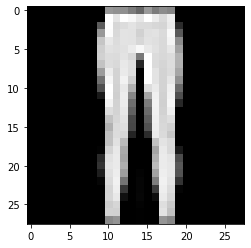

In [ ]:
# select any random index from 1 to 60,000
i = random.randint(1,X_train.shape[0])
plt.imshow(X_train[i] , cmap = 'gray')

In [ ]:
label = y_train[i]
label

1

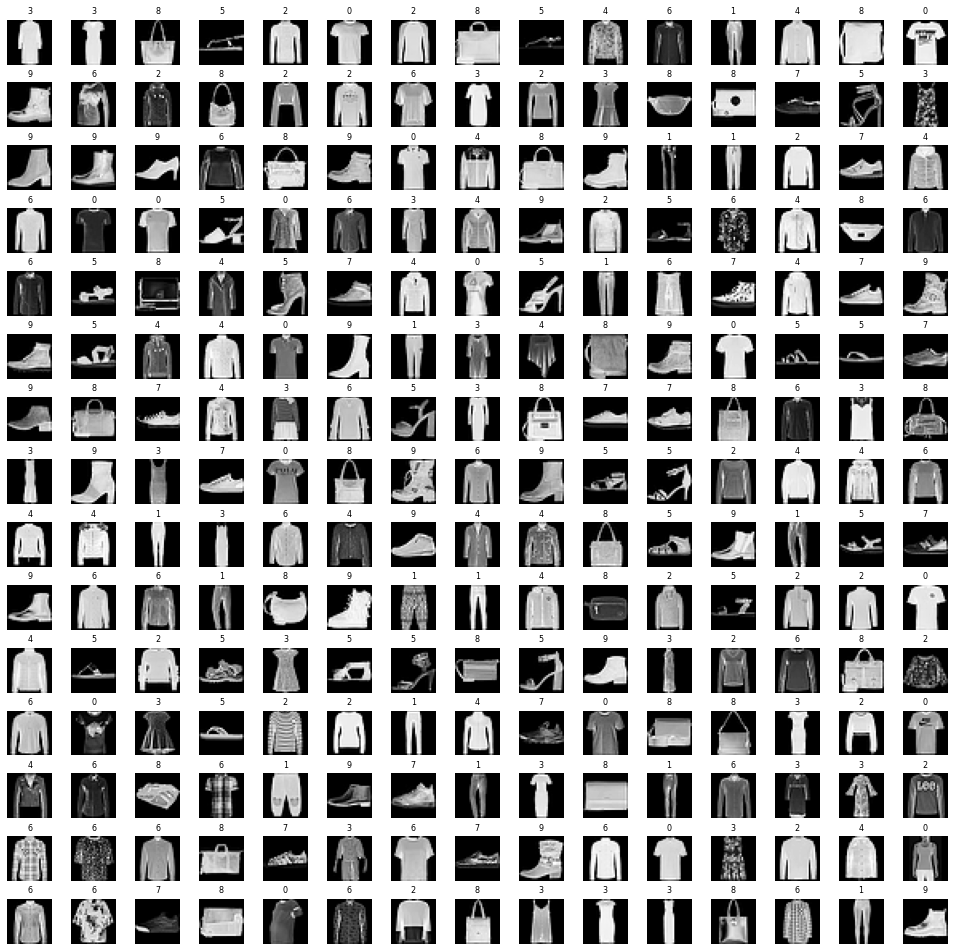

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## 2. Preparación de datos

Para entrenar el modelo, realizamos una normalización de los datos para que se encuentren entre el rango [0,1]. Esto no afectará la construcción de la imagen.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_val = X_val.reshape((len(X_val), np.prod(X_val.shape[1:])))

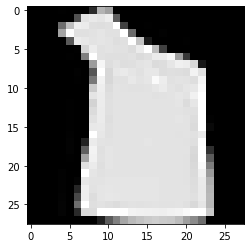

In [ ]:
plt.imshow(X_train[10].reshape(28, 28), cmap="gray")

## 3. Modelamiento

### 3.1 Arquitectura

Para el desarrollo del laboratorio se utilizará una arquitectura de Autoencoder estructurada de la siguiente manera:

![Autoencoder](https://github.com/jcestevezc/Machine-Learning-Techniques/blob/master/Laboratorio%206/Autoencoder.png?raw=true)

Los codificadores automáticos o autoencoders se utilizan para el preentrenamiento de otras redes, reducción de la dimensionalidad, aprendizaje de espacios latentes, entre otros.

Los autoencoders, por otro lado, pueden ser entrenados sin supervisión. Su estructura generalmente se caracteriza por: 
1. La cantidad de neuronas ocultas es menor que la cantidad de celdas de entrada.
2. La cantidad de celdas de salida es igual a la cantidad de celdas de entrada.
3. El autoencoder se entrena buscando que la salida esté lo más cerca posible de la entrada, obligando a los autoencoders a generalizar datos y realizar búsqueda de patrones comunes.

### 3.1.1. Modelado

In [ ]:
autoencoder = Sequential(name="Autoencoder")

#Capa de Entrada
autoencoder.add(Input(shape=(X_train.shape[1]), name='Input_Layer'))

#Encoder
autoencoder.add(Dense(512, activation='relu', name='Encoder_1'))
autoencoder.add(Dense(256, activation='relu', name='Encoder_2'))
autoencoder.add(Dense(128, activation='relu', name='Encoder_3'))
autoencoder.add(Dense(64, activation='relu', name='Encoder_4'))

#Decoder
autoencoder.add(Dense(128, activation='relu', name='Decoder_4'))
autoencoder.add(Dense(256, activation='relu', name='Decoder_3'))
autoencoder.add(Dense(512, activation='relu', name='Decoder_2'))
autoencoder.add(Dense(X_train.shape[1], activation='sigmoid', name='Decoder_1'))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder_1 (Dense)           (None, 512)               401920    
                                                                 
 Encoder_2 (Dense)           (None, 256)               131328    
                                                                 
 Encoder_3 (Dense)           (None, 128)               32896     
                                                                 
 Encoder_4 (Dense)           (None, 64)                8256      
                                                                 
 Decoder_4 (Dense)           (None, 128)               8320      
                                                                 
 Decoder_3 (Dense)           (None, 256)               33024     
                                                                 
 Decoder_2 (Dense)           (None, 512)               

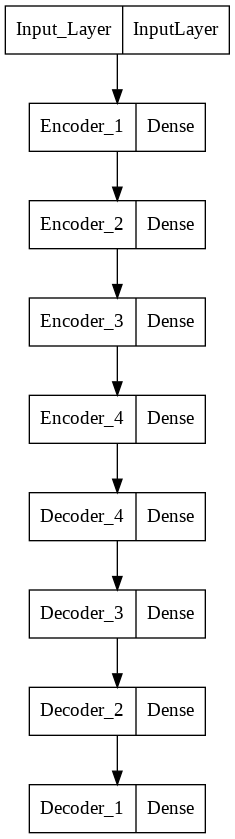

In [ ]:
plot_model(autoencoder)

Existen diferentes [Callbacks](https://keras.io/api/callbacks/) que podemos utilizar dentro de la librería de Keras, donde podemos realizar Checkpoints de nuestros modelos después de cada época. Guardar los logs de nuestros resultados y realizar Paradas tempranas según la configuración que deseemos.

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),
]

Y realizamos el entrenamiento de nuestro modelo generado.

In [ ]:
autoencoder.fit(X_train,          
                X_train, 
                epochs=50, 
                batch_size=200, 
                callbacks=my_callbacks,
                validation_data=(
                    X_val, 
                    X_val
                    )
                )

Epoch 1/50
240/240 [==============================] - 7s 27ms/step - loss: 0.3603 - val_loss: 0.3108
Epoch 2/50
240/240 [==============================] - 6s 26ms/step - loss: 0.3037 - val_loss: 0.2977
Epoch 3/50
240/240 [==============================] - 7s 28ms/step - loss: 0.2945 - val_loss: 0.2918
Epoch 4/50
240/240 [==============================] - 8s 33ms/step - loss: 0.2896 - val_loss: 0.2874
Epoch 5/50
240/240 [==============================] - 7s 28ms/step - loss: 0.2865 - val_loss: 0.2852
Epoch 6/50
240/240 [==============================] - 8s 32ms/step - loss: 0.2836 - val_loss: 0.2828
Epoch 7/50
240/240 [==============================] - 9s 38ms/step - loss: 0.2816 - val_loss: 0.2821
Epoch 8/50
240/240 [==============================] - 6s 26ms/step - loss: 0.2800 - val_loss: 0.2798
Epoch 9/50
240/240 [==============================] - 6s 26ms/step - loss: 0.2785 - val_loss: 0.2781
Epoch 10/50
240/240 [==============================] - 6s 26ms/step - loss: 0.2775 - val_lo

### 3.1.2. Predicción

Realizamos la predicción con nuestro modelo y trataremos de reconstruir las imágenes.

In [ ]:
predicted = autoencoder.predict(X_val[:10], batch_size=1)

predicted[0].shape

(784,)

## 3.1.3. Validación

In [ ]:
evaluation = autoencoder.evaluate(X_val, X_val)
print('Validation loss : {:.3f}'.format(evaluation))

375/375 [==============================] - 2s 4ms/step - loss: 0.2662
Validation loss : 0.266


Y realizamos la comparación de nuestras imágenes originales vs las reconstruidas.

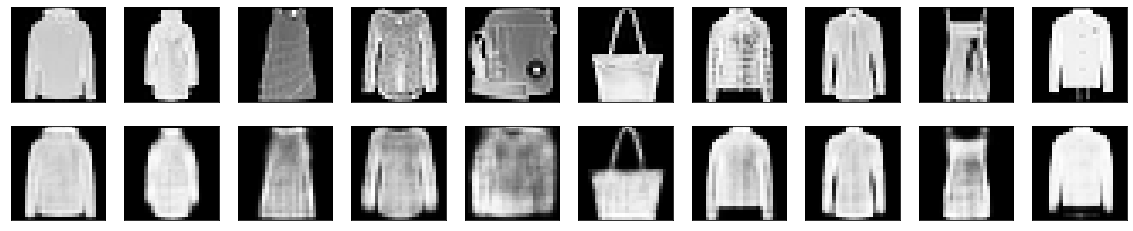

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([X_val[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

### Transferencia de Conocimiento

Una de las funciones más importantes que tienen las Redes Neuronales es la Transferencia de Conocimiento. El cuál gracias a las redes preentrenadas, uno puede adaptar el modelo al contexto necesario ahorrando tiempo al no tener un reentrenamiento de diferentes parámetros.

Para ello, vamos a 'congelar' nuestras capas donde generamos la codificación aprendida de las imágenes, lo cual nos ayudará a pasar de una dimensionalidad de $784$ a $64$.

In [ ]:
encoder = Sequential(name='Encoder')

for layers in autoencoder.layers:
    if "Decoder" in layers.name:
        break
    print(layers.name)
    layers.trainable = False
    encoder.add(layers)

Encoder_1
Encoder_2
Encoder_3
Encoder_4


Ahora, nuestro 'encoder' entrenado se podrá utilizar en nuevos modelos definiendo la Capa de Entrada.

In [ ]:
new_encoder = Sequential(name='Encoder')

new_encoder.add(Input(shape=(X_train.shape[1]), name='Input_Layer'))
new_encoder.add(encoder)

new_encoder.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Sequential)        (None, 64)                574400    
                                                                 
Total params: 574,400
Trainable params: 0
Non-trainable params: 574,400
_________________________________________________________________


Y así, podemos generar nuestra codificación de imágenes, sin necesidad de volver a reentrenar.

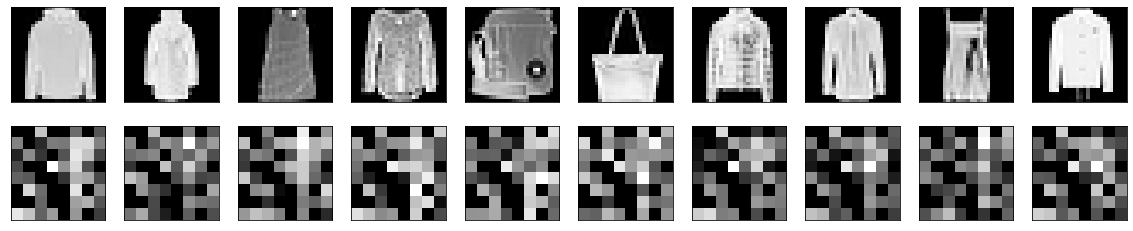

In [ ]:
predicted = new_encoder.predict(X_val[:10], batch_size=1)

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=False, sharey=False, figsize=(20,4))

for images, row in zip([X_val[:10].reshape((-1, 28, 28)), predicted.reshape((-1, 8, 8))], axes):
    for img, ax in zip(images, row):
        ax.imshow(img, cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Así mismo, podemos seguir construyendo nuestro modelo de clasificación baándonos en el codificador que aprendimos anteriormente.

In [ ]:
clf = Sequential(name='Clasificador')

#Capa de Entrada
clf.add(Input(shape=(X_train.shape[1]), name='Input_Layer'))

#Capas Ocultas
clf.add(encoder)
clf.add(Dense(50, activation='relu', name='Capa_Oculta_Clasificador'))

#Capa de Salida
clf.add(Dense(10, activation='softmax', name='Capa_Clasificador'))


clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
clf.summary()

Model: "Clasificador"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Sequential)        (None, 64)                574400    
                                                                 
 Capa_Oculta_Clasificador (D  (None, 50)               3250      
 ense)                                                           
                                                                 
 Capa_Clasificador (Dense)   (None, 10)                510       
                                                                 
Total params: 578,160
Trainable params: 3,760
Non-trainable params: 574,400
_________________________________________________________________


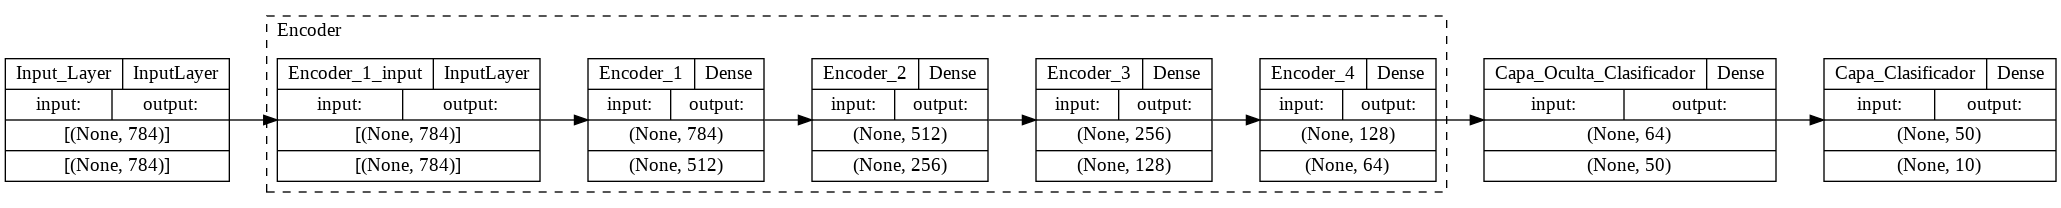

In [ ]:
plot_model(clf, show_shapes=True, rankdir='LR', expand_nested=True)

Luego, entrenamos nuestro modelo. Al tener una menor cantidad de parámetros que estimar, vemos que el tiempo de ejecución del entrenamiento se reduce considerablemente.

In [ ]:
clf.fit(X_train,          
        y_train, 
        epochs=50, 
        batch_size=200, 
        callbacks=my_callbacks,
        validation_data=(
            X_val, 
            y_val
            )
        )

Epoch 1/50
240/240 [==============================] - 3s 12ms/step - loss: 1.4696 - accuracy: 0.5771 - val_loss: 0.6867 - val_accuracy: 0.7630
Epoch 2/50
240/240 [==============================] - 3s 11ms/step - loss: 0.5924 - accuracy: 0.7929 - val_loss: 0.5474 - val_accuracy: 0.8050
Epoch 3/50
240/240 [==============================] - 2s 10ms/step - loss: 0.5098 - accuracy: 0.8169 - val_loss: 0.5008 - val_accuracy: 0.8220
Epoch 4/50
240/240 [==============================] - 3s 11ms/step - loss: 0.4740 - accuracy: 0.8323 - val_loss: 0.4795 - val_accuracy: 0.8256
Epoch 5/50
240/240 [==============================] - 2s 10ms/step - loss: 0.4544 - accuracy: 0.8377 - val_loss: 0.4640 - val_accuracy: 0.8315
Epoch 6/50
240/240 [==============================] - 3s 11ms/step - loss: 0.4399 - accuracy: 0.8428 - val_loss: 0.4522 - val_accuracy: 0.8378
Epoch 7/50
240/240 [==============================] - 3s 11ms/step - loss: 0.4289 - accuracy: 0.8478 - val_loss: 0.4404 - val_accuracy: 0.8400

Y así, podremos realizar la evaluación de nuestro modelo según las métricas que ya conocemos.

In [ ]:
y_pred = np.argmax(clf.predict(X_train), axis=1)

print(classification_report(y_true=y_train, y_pred=y_pred))

[3 6 5 ... 6 0 7]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      4814
           1       0.99      0.97      0.98      4827
           2       0.72      0.84      0.78      4758
           3       0.90      0.87      0.88      4772
           4       0.79      0.79      0.79      4784
           5       0.95      0.93      0.94      4800
           6       0.74      0.57      0.65      4810
           7       0.92      0.94      0.93      4820
           8       0.97      0.97      0.97      4832
           9       0.95      0.95      0.95      4783

    accuracy                           0.87     48000
   macro avg       0.87      0.87      0.87     48000
weighted avg       0.87      0.87      0.87     48000



### Evaluación

Y ya al final. Con nuestro codificador armado y nuestro clasificador entrenado, podremos realizar la predicción de nuestros datos de test para determinar el rendimiento de nuestro modelo en producción.

In [ ]:
y_pred = np.argmax(clf.predict(X_test), axis=1)

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.68      0.82      0.74      1000
           3       0.88      0.84      0.86      1000
           4       0.76      0.76      0.76      1000
           5       0.96      0.92      0.94      1000
           6       0.71      0.54      0.62      1000
           7       0.91      0.94      0.92      1000
           8       0.96      0.96      0.96      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

